In [1]:
import sys
sys.path.append('/content')
from src.fluvius import USGS_Water_DB, USGS_Station

%load_ext autoreload
%autoreload 2

db = USGS_Water_DB()
db.get_station_df()
db.station_df.to_csv('/content/data/station_metadata.csv', index=False)



====== WebDriver manager ======
Current google-chrome version is 90.0.4430
Get LATEST driver version for 90.0.4430
There is no [linux64] chromedriver for browser 90.0.4430 in cache
Get LATEST driver version for 90.0.4430
Trying to download new driver from https://chromedriver.storage.googleapis.com/90.0.4430.24/chromedriver_linux64.zip
Driver has been saved in cache [/root/.wdm/drivers/chromedriver/linux64/90.0.4430.24]


In [2]:
db.station_df

,site_no,site_name,Latitude,Longitude,geometry
0,01472157,"French Creek near Phoenixville, PA",40.1515,-75.6013,POINT (-75.60130 40.15150)
1,01478245,"White Clay Creek near Strickersville, PA",39.7475,-75.7708,POINT (-75.77080 39.74750)
2,01480617,"West Branch Brandywine Creek at Modena, PA",39.9618,-75.8013,POINT (-75.80130 39.96180)
3,01480870,East Branch Brandywine Creek below Downingtown...,39.9687,-75.6733,POINT (-75.67330 39.96870)
4,01481000,"Brandywine Creek at Chadds Ford, PA",39.8698,-75.5933,POINT (-75.59330 39.86980)
...,...,...,...,...,...
160,393806095273700,"Atchison County Lake near Horton, KS",39.6350,-95.4603,POINT (-95.46030 39.63500)
161,393817095260100,"Clear Creek at Decator Road near Horton, KS",39.6381,-95.4336,POINT (-95.43360 39.63810)
162,394126096073500,Black Vermillion River Tributary above Central...,39.6906,-96.1264,POINT (-96.12640 39.69060)
163,394146096085500,"Centralia Lake near Centralia, KS",39.6961,-96.1486,POINT (-96.14860 39.69610)


<AxesSubplot:>

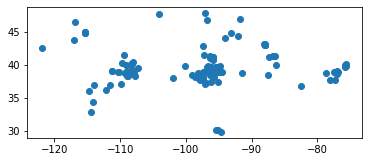

In [3]:
db.station_df.plot()

In [11]:
d_list = []
for site_no in db.station_df.site_no: #full loop for all stations took 24 hours...
    #instantiate water data
    water_data = USGS_Station(site_no) 
    water_data.get_water_df()
    #we would likely append this data to the USGS_Water_DB dataframe?
    #especially if the csv is already collected, open it locally?
    d_list.append(water_data)
    #currently only 39 complete stations which is a problem...





====== WebDriver manager ======
Current google-chrome version is 90.0.4430
Get LATEST driver version for 90.0.4430
Driver [/root/.wdm/drivers/chromedriver/linux64/90.0.4430.24/chromedriver] found in cache


In [12]:
d_list[5].df

,Date-Time,Instantaneous computed discharge (cfs),Computed instantaneous suspended sediment (mg/L),"Computed instantaneous suspended sediment, lower 90% prediction (mg/L)","Computed instantaneous suspended sediment, upper 90% prediction (mg/L)",Instantaneous turbidity (FNU)
0,12/31/2014 23:00,38,2.5,1.0,7.2,0.80
1,12/31/2014 22:00,38,2.7,1.0,8.0,0.90
2,12/31/2014 21:00,38,2.7,1.0,8.0,0.90
3,12/31/2014 20:00,38,2.5,1.0,7.2,0.80
4,12/31/2014 19:00,38,2.5,1.0,7.2,0.80
...,...,...,...,...,...,...
8678,01/01/2020 05:00,22,3.2,1.1,9.5,1.1
8679,01/01/2020 04:00,22,3.5,1.2,10,1.2
8680,01/01/2020 03:00,22,3.2,1.1,9.5,1.1
8681,01/01/2020 02:00,22,3.2,1.1,9.5,1.1
